In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Groceries_dataset.csv')

# Display the first few rows to check the structure
print(df.head())


   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


In [2]:
print(df.shape)
print(df.info())


(38765, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB
None


In [3]:
df.describe

<bound method NDFrame.describe of        Member_number        Date        itemDescription
0               1808  21-07-2015         tropical fruit
1               2552  05-01-2015             whole milk
2               2300  19-09-2015              pip fruit
3               1187  12-12-2015       other vegetables
4               3037  01-02-2015             whole milk
...              ...         ...                    ...
38760           4471  08-10-2014          sliced cheese
38761           2022  23-02-2014                  candy
38762           1097  16-04-2014               cake bar
38763           1510  03-12-2014  fruit/vegetable juice
38764           1521  26-12-2014               cat food

[38765 rows x 3 columns]>

In [4]:
df.isna().sum()

,0
Member_number,0
Date,0
itemDescription,0


In [5]:
df['Date'] = pd.to_datetime(df['Date']) ## Type-Conversion from Object to Dateime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


<ipython-input-5-d2d237bca67d>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date']) ## Type-Conversion from Object to Dateime


In [6]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day

In [7]:
df.head(5)

,Member_number,Date,itemDescription,year,month,day
0,1808,2015-07-21,tropical fruit,2015,7,21
1,2552,2015-01-05,whole milk,2015,1,5
2,2300,2015-09-19,pip fruit,2015,9,19
3,1187,2015-12-12,other vegetables,2015,12,12
4,3037,2015-02-01,whole milk,2015,2,1


In [8]:
# Check for and remove duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Remove duplicates
#data_cleaned = data_cleaned.drop_duplicates()

# Check the dataset after removing duplicates
#print(f"Dataset size after removing duplicates: {data_cleaned.shape}")


Number of duplicate rows: 759


EDA

In [9]:
# Group by Customer ID and Date of Purchase, then aggregate product descriptions into lists
grouped_data = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()

# Display the first few rows of grouped data to check the structure
print(grouped_data.head())


   Member_number       Date                                    itemDescription
0           1000 2014-06-24                  [whole milk, pastry, salty snack]
1           1000 2015-03-15  [sausage, whole milk, semi-finished bread, yog...
2           1000 2015-05-27                         [soda, pickled vegetables]
3           1000 2015-07-24                     [canned beer, misc. beverages]
4           1000 2015-11-25                        [sausage, hygiene articles]


In [10]:
# Check the structure and types of the dataset
print(df.info())

# Check basic statistics (for example, the number of unique customers, transactions, and products)
print(f"Number of unique customers: {grouped_data['Member_number'].nunique()}")
print(f"Number of transactions: {grouped_data.shape[0]}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
 3   year             38765 non-null  int32         
 4   month            38765 non-null  int32         
 5   day              38765 non-null  int32         
dtypes: datetime64[ns](1), int32(3), int64(1), object(1)
memory usage: 1.3+ MB
None
Number of unique customers: 3898
Number of transactions: 14963


[('whole milk', 2502), ('other vegetables', 1898), ('rolls/buns', 1716), ('soda', 1514), ('yogurt', 1334), ('root vegetables', 1071), ('tropical fruit', 1032), ('bottled water', 933), ('sausage', 924), ('citrus fruit', 812)]
[('whisky', 8), ('salad dressing', 6), ('make up remover', 5), ('frozen chicken', 5), ('toilet cleaner', 5), ('rubbing alcohol', 5), ('bags', 4), ('baby cosmetics', 3), ('preservation products', 1), ('kitchen utensil', 1)]


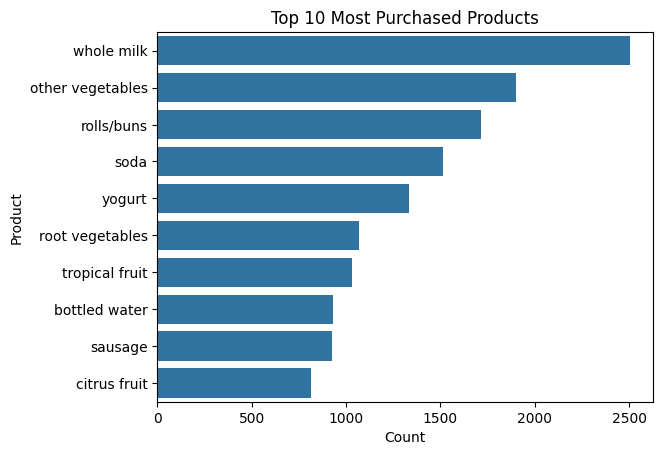

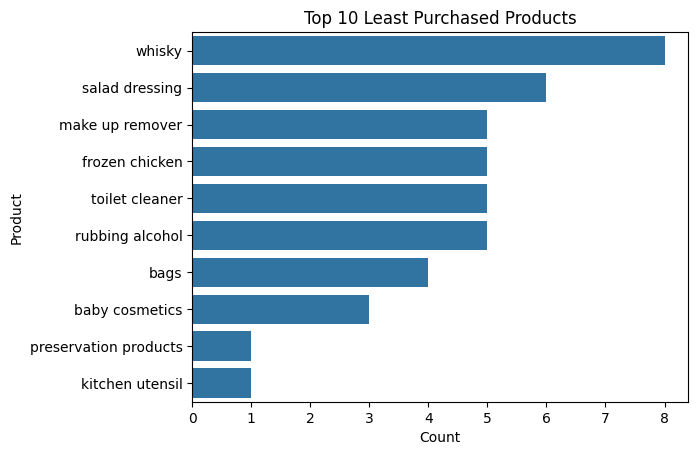

In [11]:
# Flatten the list of products to count the frequency of each product
from collections import Counter

# Count the frequency of each product
all_products = [product for sublist in grouped_data['itemDescription'] for product in sublist]
product_count = Counter(all_products)

# Display the top 10 most purchased products
top_10_products = product_count.most_common(10)
print(top_10_products)
least_10_products = product_count.most_common()[-10:]
print(least_10_products)

# Plot the top 10 most frequently purchased products
import matplotlib.pyplot as plt
import seaborn as sns

top_products_df = pd.DataFrame(top_10_products, columns=['Product', 'Count'])
sns.barplot(x='Count', y='Product', data=top_products_df)
plt.title('Top 10 Most Purchased Products')
plt.show()
top_products_df = pd.DataFrame(least_10_products, columns=['Product', 'Count'])
sns.barplot(x='Count', y='Product', data=top_products_df)
plt.title('Top 10 Least Purchased Products')
plt.show()

In [12]:
# Convert to DataFrame for easier handling
top_products_df = pd.DataFrame(product_count.items(), columns=['Product', 'Count'])

# Save the Product Purchase Frequency dataset
top_products_df.to_csv('Product_Counts.csv', index=False)
print("Product Purchase Frequency dataset saved as 'Product_Counts.csv'")

Product Purchase Frequency dataset saved as 'Product_Counts.csv'


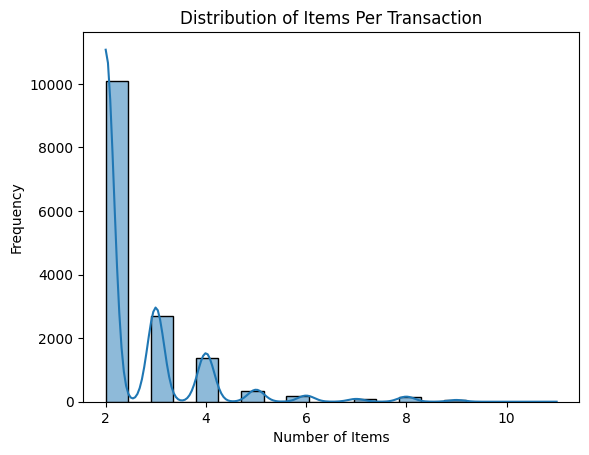

Average number of items per transaction: 2.590723785337165


In [13]:
# Calculate the number of items per transaction
grouped_data['Number of Items'] = grouped_data['itemDescription'].apply(len)

# Plot the distribution of the number of items per transaction
sns.histplot(grouped_data['Number of Items'], bins=20, kde=True)
plt.title('Distribution of Items Per Transaction')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.show()

# Print the average number of items per transaction
print(f"Average number of items per transaction: {grouped_data['Number of Items'].mean()}")


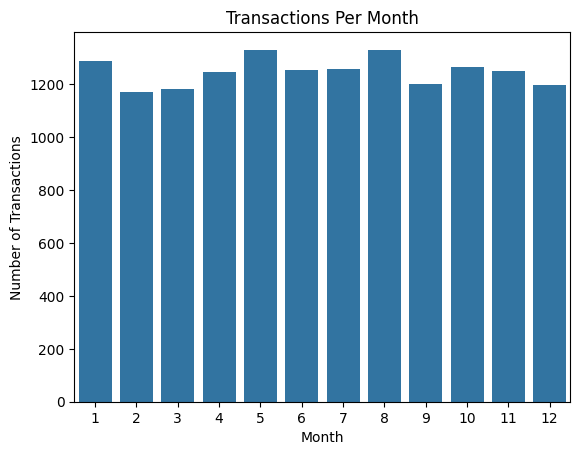

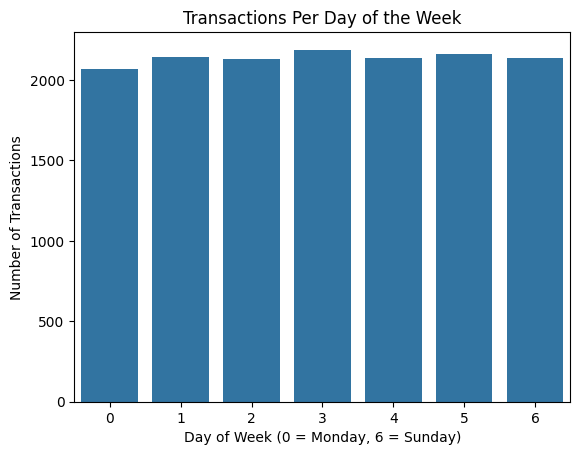

In [14]:
# Extract month and day of the week from the 'Date of Purchase' column
grouped_data['Month'] = grouped_data['Date'].dt.month
grouped_data['Day of Week'] = grouped_data['Date'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Plot the number of transactions per month
sns.countplot(x='Month', data=grouped_data)
plt.title('Transactions Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

# Plot the number of transactions per day of the week
sns.countplot(x='Day of Week', data=grouped_data)
plt.title('Transactions Per Day of the Week')
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Number of Transactions')
plt.show()


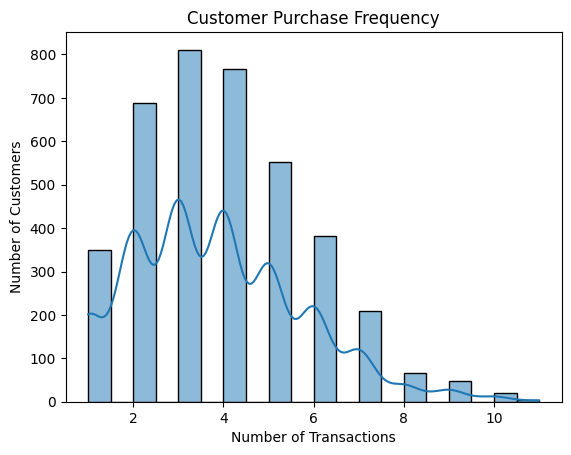

Average number of transactions per customer: 3.8386351975371986


In [15]:
# Calculate the number of transactions per customer
customer_purchase_frequency = grouped_data.groupby('Member_number')['Date'].nunique()

# Plot the distribution of purchase frequency
sns.histplot(customer_purchase_frequency, bins=20, kde=True)
plt.title('Customer Purchase Frequency')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.show()

# Print the average number of transactions per customer
print(f"Average number of transactions per customer: {customer_purchase_frequency.mean()}")


. Feature Engineering
let’s prepare the dataset for the Market Basket Analysis algorithms (Apriori, FP-Growth, and Eclat). The main task here is to get the data in the right format.

2.1 One-Hot Encoding the Data
For algorithms like Apriori and FP-Growth, you’ll need to one-hot encode the product descriptions, where each column represents a product, and each row represents a transaction with binary values (1 = purchased, 0 = not purchased).

In [16]:
from mlxtend.preprocessing import TransactionEncoder

# Convert transactions into a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(grouped_data['itemDescription']).transform(grouped_data['itemDescription'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Display the first few rows of the one-hot encoded data
print(df_encoded.head())


   Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False     False             False             False   

   baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
0           False  False          False             False  False    False   
1           False  False          False             False  False    False   
2           False  False          False             False  False    False   
3           False  False          False             False  False    False   
4           False  False          False             False  False    False   

   ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0  ...   False 

In [17]:
# Prepare a list of transactions for the Eclat algorithm
transactions = grouped_data['itemDescription'].tolist()

# Display the first few transactions
print(transactions[:5])


[['whole milk', 'pastry', 'salty snack'], ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'], ['soda', 'pickled vegetables'], ['canned beer', 'misc. beverages'], ['sausage', 'hygiene articles']]


In [18]:
# Create additional time-based features
grouped_data['Day of Week'] = grouped_data['Date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
grouped_data['Month'] = grouped_data['Date'].dt.month


In [19]:
grouped_data.head()

,Member_number,Date,itemDescription,Number of Items,Month,Day of Week
0,1000,2014-06-24,"[whole milk, pastry, salty snack]",3,6,1
1,1000,2015-03-15,"[sausage, whole milk, semi-finished bread, yog...",4,3,6
2,1000,2015-05-27,"[soda, pickled vegetables]",2,5,2
3,1000,2015-07-24,"[canned beer, misc. beverages]",2,7,4
4,1000,2015-11-25,"[sausage, hygiene articles]",2,11,2


In [20]:
# Save the Transaction-Level dataset
grouped_data.to_csv('Transaction_Dataset.csv', index=False)
print("Transaction-Level dataset saved as 'Transaction_Dataset.csv'")

Transaction-Level dataset saved as 'Transaction_Dataset.csv'


In [21]:
# Install mlxtend if not already installed
!pip install mlxtend


In [22]:
from mlxtend.frequent_patterns import apriori, association_rules

# Set a minimum support value, for example 0.01 (1% of all transactions)
# You can adjust this value based on your dataset
frequent_itemsets = apriori(df_encoded, min_support=0.001)

# Display the frequent itemsets
print(frequent_itemsets)


      support         itemsets
0    0.004010              (0)
1    0.021386              (1)
2    0.001470              (2)
3    0.001938              (3)
4    0.008087              (6)
..        ...              ...
745  0.001136  (122, 164, 130)
746  0.001002  (122, 164, 138)
747  0.001337  (122, 164, 165)
748  0.001069  (130, 164, 138)
749  0.001470  (130, 164, 165)

[750 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
frequent_itemsets =  apriori(df_encoded, min_support=0.001, use_colnames=True)
print(frequent_itemsets)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


      support                           itemsets
0    0.004010            (Instant food products)
1    0.021386                         (UHT-milk)
2    0.001470                 (abrasive cleaner)
3    0.001938                 (artif. sweetener)
4    0.008087                    (baking powder)
..        ...                                ...
745  0.001136  (whole milk, sausage, rolls/buns)
746  0.001002     (whole milk, soda, rolls/buns)
747  0.001337   (yogurt, whole milk, rolls/buns)
748  0.001069        (soda, sausage, whole milk)
749  0.001470      (yogurt, sausage, whole milk)

[750 rows x 2 columns]


In [24]:
frequent_itemsets.to_csv('Apriori_Frequent_Itemsets.csv', index=False)

print("Apriori Frequent Itemsets saved as 'Apriori_Frequent_Itemsets.csv'")


Apriori Frequent Itemsets saved as 'Apriori_Frequent_Itemsets.csv'


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
# Generate association rules with minimum confidence of 0.2 (20%)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Sort rules by lift and display the top results
rules = rules.sort_values('lift', ascending=False)
print(rules)


               antecedents        consequents  antecedent support  \
128   (yogurt, whole milk)          (sausage)            0.011161   
129  (sausage, whole milk)           (yogurt)            0.008955   
127      (yogurt, sausage)       (whole milk)            0.005748   
33                 (flour)   (tropical fruit)            0.009757   
89      (processed cheese)  (root vegetables)            0.010158   
..                     ...                ...                 ...   
109   (whipped/sour cream)       (whole milk)            0.043708   
101        (sliced cheese)       (whole milk)            0.014035   
4                (berries)       (whole milk)            0.021787   
97           (salty snack)       (whole milk)            0.018780   
28               (dessert)       (whole milk)            0.023592   

     consequent support   support  confidence      lift  leverage  conviction  \
128            0.060349  0.001470    0.131737  2.182917  0.000797    1.082219   
129      

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
rules.to_csv('Apriori_Association_Rules.csv', index=False)
print("Apriori Association Rules saved as 'Apriori_Association_Rules.csv'")

Apriori Association Rules saved as 'Apriori_Association_Rules.csv'


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **1. Apriori Output: Frequent Itemsets**

I used the Apriori algorithm with a minimum support of 0.001 (0.1% of all transactions). This generated frequent itemsets, and here's what they represent:

**Support:**  The proportion of transactions in which the itemset appears.

**Itemsets:** The combination of items frequently bought together.

**Example frequent itemsets from your output:**

- (whole milk, rolls/buns, sausage) with support of 0.001136: This itemset appears in about 0.1136% of all transactions.
- (whole milk, yogurt, sausage) with support of 0.001470: This combination appears in about 0.1470% of transactions.

These frequent itemsets are the basis for generating association rules.

# **2. Association Rules Output**
After identifying frequent itemsets, I generated association rules using confidence as the metric, with a minimum threshold of 0.1 (10%).

The rules are generated in the following format:

**Antecedents: **The "if" part of the rule (e.g., products bought together).

**Consequents: **The "then" part of the rule (e.g., recommended product).

**Metrics:**

- **Support:** How often both the antecedent and consequent occur together in the dataset.
-**Confidence**: The probability that a consequent is bought if the antecedent is bought.
- **Lift:** How much more likely the consequent is to be bought when the antecedent is bought, compared to random chance.
- **Leverage:** The difference between the observed support and the expected support.
- **Conviction:** Measures how much the presence of the antecedent increases the likelihood of the consequent.

Let us see and example

(whole milk, yogurt) → (sausage)
- Support: 0.001470 (0.147% of all transactions contain this combination).
Confidence: 0.131737 (13.17% of the transactions containing whole milk and yogurt also contain sausage).
- Lift: 2.182917 (The presence of whole milk and yogurt makes the purchase of sausage 2.18 times more likely than random chance).

This rule has a relatively high lift, meaning that customers who buy whole milk and yogurt are significantly more likely to also buy sausage.

# **Interpretation of Key Metrics**:

**Confidence:** High confidence means that, given the antecedents, the consequents are frequently purchased together. For example, a confidence of 0.164179 for the rule (whole milk, sausage) → (yogurt) means that in 16.42% of the transactions where whole milk and sausage are bought, yogurt is also bought.

**Lift:** A lift above 1 suggests that there is a positive association between the items in the rule. In your results, for example, the rule (whole milk, yogurt) → (sausage) has a lift of 2.182917, indicating a strong association.

**Zhang's Metric:** This measures the dependency between the antecedent and the consequent. A value near 0 implies independence, while a positive value shows positive dependency, and a negative value shows negative dependency.

# **Insights that we can Can Draw:**

- **High-Lift Rules:** The rule with a high lift, such as (whole milk, yogurt) → (sausage) with a lift of 2.18, indicates that promoting a bundle or special offer involving these items together could be effective because customers tend to buy these items together.

# **Product Recommendations**
I would recommend products based on the confidence of the rules. For instance, if a customer buys whole milk and sausage, we will recommend yogurt since there is a relatively high confidence that these items are purchased together.

In [27]:
from mlxtend.frequent_patterns import fpgrowth

# Set a minimum support value, similar to Apriori
frequent_itemsets_fp = fpgrowth(df_encoded, min_support=0.001, use_colnames=True)

# Display the frequent itemsets found by FP-Growth
print(frequent_itemsets_fp)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


      support                         itemsets
0    0.157923                     (whole milk)
1    0.051728                         (pastry)
2    0.018780                    (salty snack)
3    0.085879                         (yogurt)
4    0.060349                        (sausage)
..        ...                              ...
745  0.001403            (yogurt, chewing gum)
746  0.001069  (other vegetables, chewing gum)
747  0.001002              (soda, chewing gum)
748  0.001069              (pasta, whole milk)
749  0.001002  (seasonal products, rolls/buns)

[750 rows x 2 columns]


In [28]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'whole milk', 'rolls/buns'} ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
677,0.013968,"(whole milk, rolls/buns)"


In [29]:
# Generate association rules with a minimum confidence threshold of 0.2
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.1)

# Sort and display the top rules by lift
rules_fp = rules_fp.sort_values('lift', ascending=False)
print(rules_fp)


               antecedents        consequents  antecedent support  \
11    (yogurt, whole milk)          (sausage)            0.011161   
12   (sausage, whole milk)           (yogurt)            0.008955   
10       (yogurt, sausage)       (whole milk)            0.005748   
70                 (flour)   (tropical fruit)            0.009757   
93      (processed cheese)  (root vegetables)            0.010158   
..                     ...                ...                 ...   
31    (whipped/sour cream)       (whole milk)            0.043708   
82         (sliced cheese)       (whole milk)            0.014035   
114              (berries)       (whole milk)            0.021787   
1            (salty snack)       (whole milk)            0.018780   
73               (dessert)       (whole milk)            0.023592   

     consequent support   support  confidence      lift  leverage  conviction  \
11             0.060349  0.001470    0.131737  2.182917  0.000797    1.082219   
12       

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
# Save FP-Growth itemsets and rules
frequent_itemsets_fp.to_csv('FP_Growth_Frequent_Itemsets.csv', index=False)
rules_fp.to_csv('FP_Growth_Association_Rules.csv', index=False)
print("FP-Growth Frequent Itemsets saved as 'FP_Growth_Frequent_Itemsets.csv'")
print("FP-Growth Association Rules saved as 'FP_Growth_Association_Rules.csv'")

FP-Growth Frequent Itemsets saved as 'FP_Growth_Frequent_Itemsets.csv'
FP-Growth Association Rules saved as 'FP_Growth_Association_Rules.csv'


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **FP-Growth Output: Frequent Itemsets**

I applied the FP-Growth algorithm with a minimum support of 0.001 (0.1% of all transactions), just like the Apriori approach we just did above.

Here’s a breakdown of the frequent itemsets and their support values:


**Example frequent itemsets from the FP-Growth output:**

**(whole milk) with support of 0.157923:** This means that whole milk appears in 15.79% of all transactions.

**(whole milk, yogurt, sausage) with support of 0.001470:** This means that the combination of whole milk, yogurt, and sausage appears in 0.147% of transactions.

# **Comparison of Frequent Itemsets from FP-Growth and Apriori**

Both Apriori and FP-Growth algorithms identified similar frequent itemsets, but FP-Growth is known to be faster, especially with larger datasets. The frequent itemsets are the same because both methods use the same support threshold, but the FP-Growth algorithm avoids generating candidate itemsets explicitly, making it more efficient.

**Association Rules Using FP-Growth**

I generated association rules using FP-Growth with a minimum confidence threshold of 0.1 (10%).


**Example rules**:

(whole milk, yogurt) → (sausage):

Support: 0.001470 (appears in 0.147% of transactions).
Confidence: 0.131737 (13.17% of the transactions where customers bought whole milk and yogurt also included sausage).
Lift: 2.182917 (buying whole milk and yogurt increases the likelihood of also buying sausage by 2.18 times).
(whole milk, sausage) → (yogurt):

Support: 0.001470 (0.147% of transactions).
Confidence: 0.164179 (16.42% of the transactions containing whole milk and sausage also include yogurt).
Lift: 1.911760 (buying whole milk and sausage makes buying yogurt 1.91 times more likely).
Comparison of Apriori and FP-Growth Results
Both Apriori and FP-Growth generated similar frequent itemsets and association rules because they used the same support and confidence thresholds. However, FP-Growth is generally more efficient, particularly with large datasets, because it builds a compressed tree structure (FP-Tree) instead of generating candidate itemsets like Apriori does.

# **Conclusion and Insights**
Both algorithms identified the same strong association rules with similar metrics. FP-Growth is generally preferred when working with larger datasets due to its efficiency.

The rule (whole milk, yogurt) → (sausage) had a lift of 2.18, indicating a strong association. This insight could be useful for product recommendation or marketing strategies.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


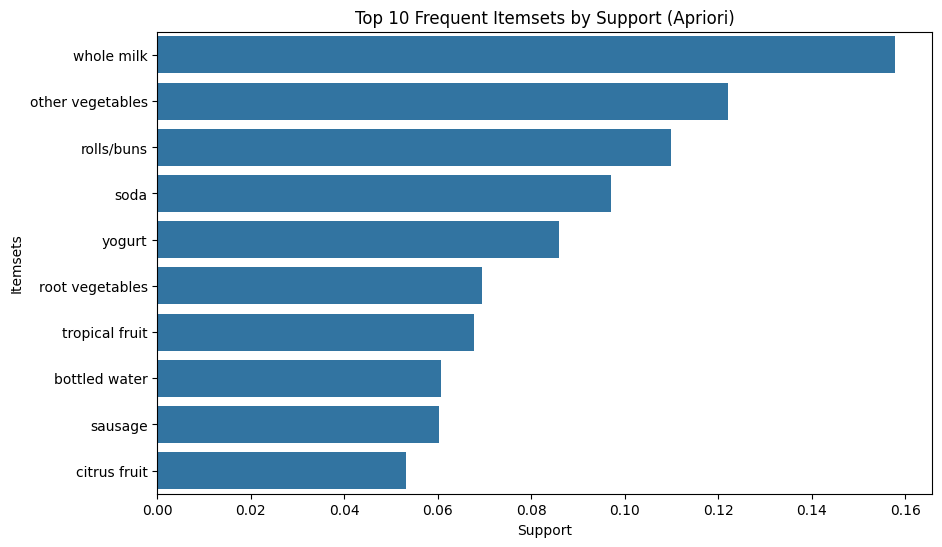

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort frequent itemsets by support
top_itemsets = frequent_itemsets.nlargest(10, 'support')

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y=top_itemsets['itemsets'].apply(lambda x: ', '.join(list(x))), data=top_itemsets)
plt.title('Top 10 Frequent Itemsets by Support (Apriori)')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


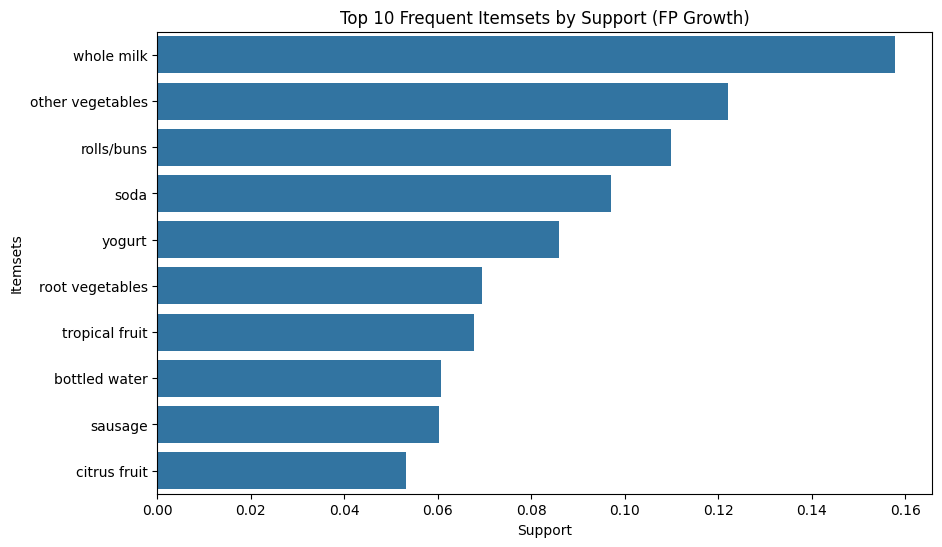

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort frequent itemsets by support
top_itemsets = frequent_itemsets_fp.nlargest(10, 'support')

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y=top_itemsets['itemsets'].apply(lambda x: ', '.join(list(x))), data=top_itemsets)
plt.title('Top 10 Frequent Itemsets by Support (FP Growth)')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


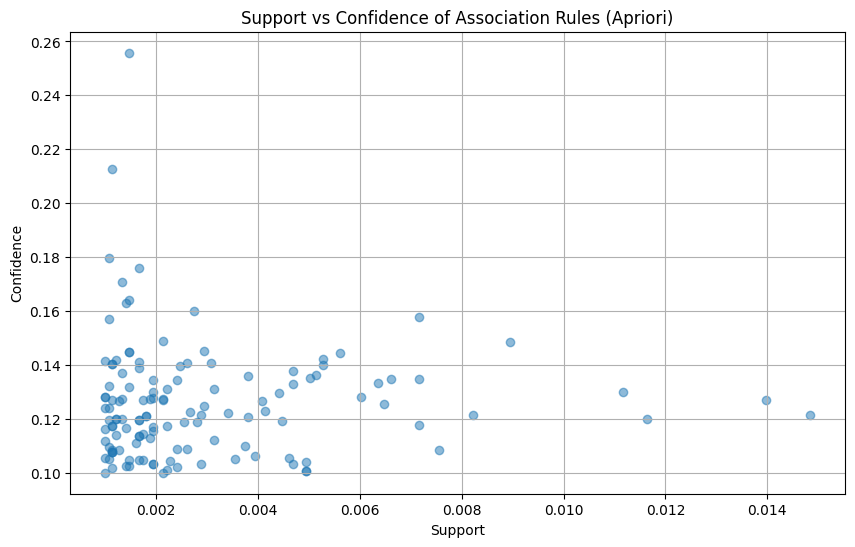

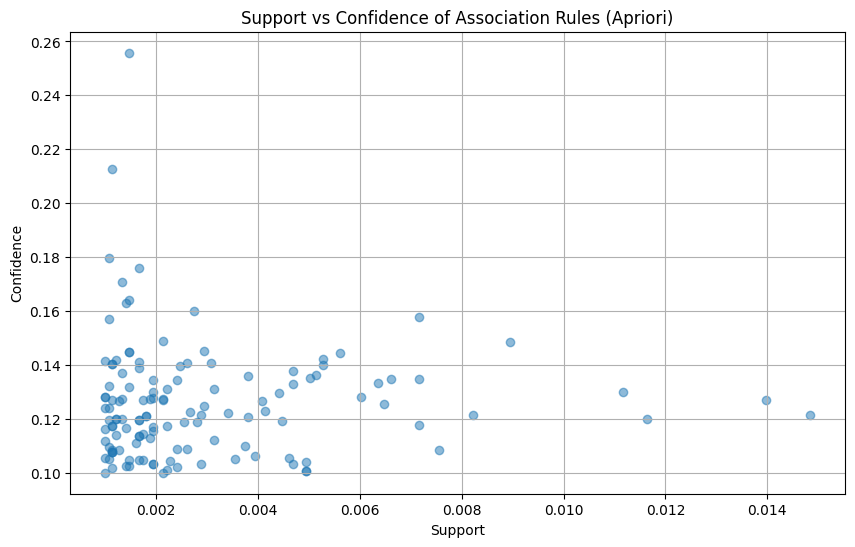

In [33]:
# Scatter plot of support vs confidence
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5, marker="o")
plt.title('Support vs Confidence of Association Rules (Apriori)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()
# Scatter plot of support vs confidence
plt.figure(figsize=(10, 6))
plt.scatter(rules_fp['support'], rules_fp['confidence'], alpha=0.5, marker="o")
plt.title('Support vs Confidence of Association Rules (Apriori)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()


In [34]:
import pandas as pd
import datetime as dt

# Convert 'Date of purchase' column to datetime format
#df['Date'] = pd.to_datetime(df['Date'])

# Set the reference date (the latest date in the dataset + 1 day)
reference_date = df['Date'].max() + dt.timedelta(days=1)

# Group by Customer ID to calculate RFM metrics
rfm = df.groupby('Member_number').agg({
    'Date': lambda x: (reference_date - x.max()).days,  # Recency
    'Member_number': 'count',                                        # Frequency
    'itemDescription': lambda x: len(x)           # Monetary (you may replace with actual sales value if available)
})

# Rename columns to RFM metrics
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Assign RFM scores (you can modify the quantile cutoffs)
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_score'] = pd.qcut(rfm['Frequency'], 5, labels=[1, 2, 3, 4, 5])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Create RFM segment
rfm['RFM_Segment'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)
rfm['RFM_Score'] = rfm[['R_score', 'F_score', 'M_score']].sum(axis=1)

# Display RFM table
print(rfm.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


               Recency  Frequency  Monetary R_score F_score M_score  \
Member_number                                                         
1000                36         13        13       5       4       4   
1001               243         12        12       2       4       4   
1002               123          8         8       3       2       2   
1003               324          8         8       2       2       2   
1004                29         21        21       5       5       5   

              RFM_Segment  RFM_Score  
Member_number                         
1000                  544         13  
1001                  244         10  
1002                  322          7  
1003                  222          6  
1004                  555         15  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


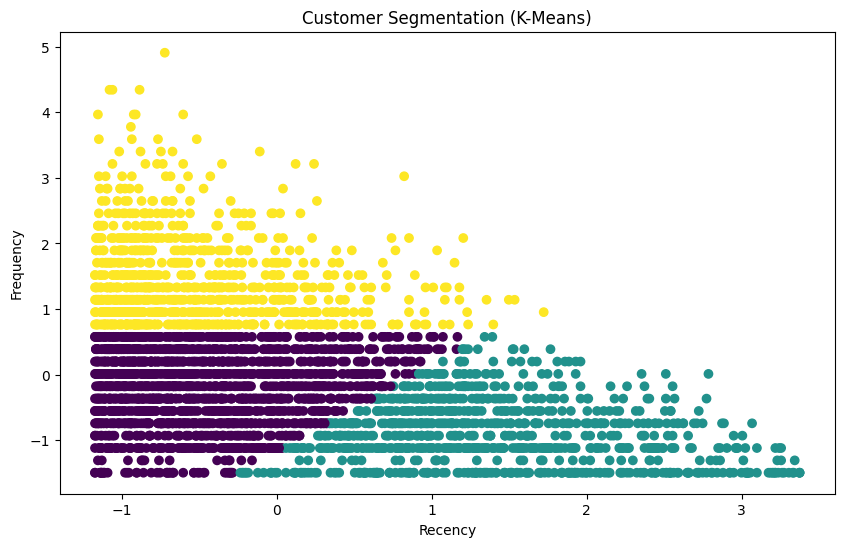

In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select RFM features for clustering
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]

# Standardize the features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

# Apply K-Means clustering with an arbitrary number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Plot the clusters (using first two features for simplicity)
plt.figure(figsize=(10, 6))
plt.scatter(rfm_scaled[:, 0], rfm_scaled[:, 1], c=rfm['Cluster'], cmap='viridis')
plt.title('Customer Segmentation (K-Means)')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


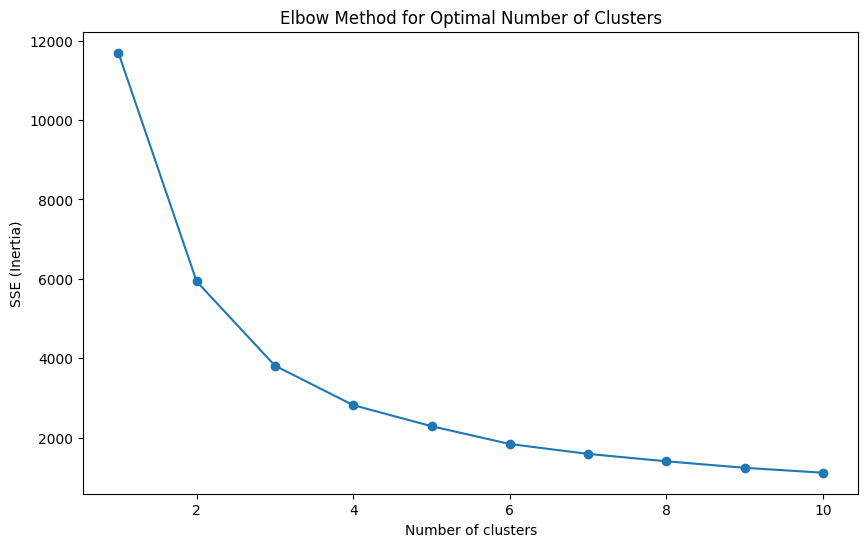

In [36]:
# Find the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Inertia)')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


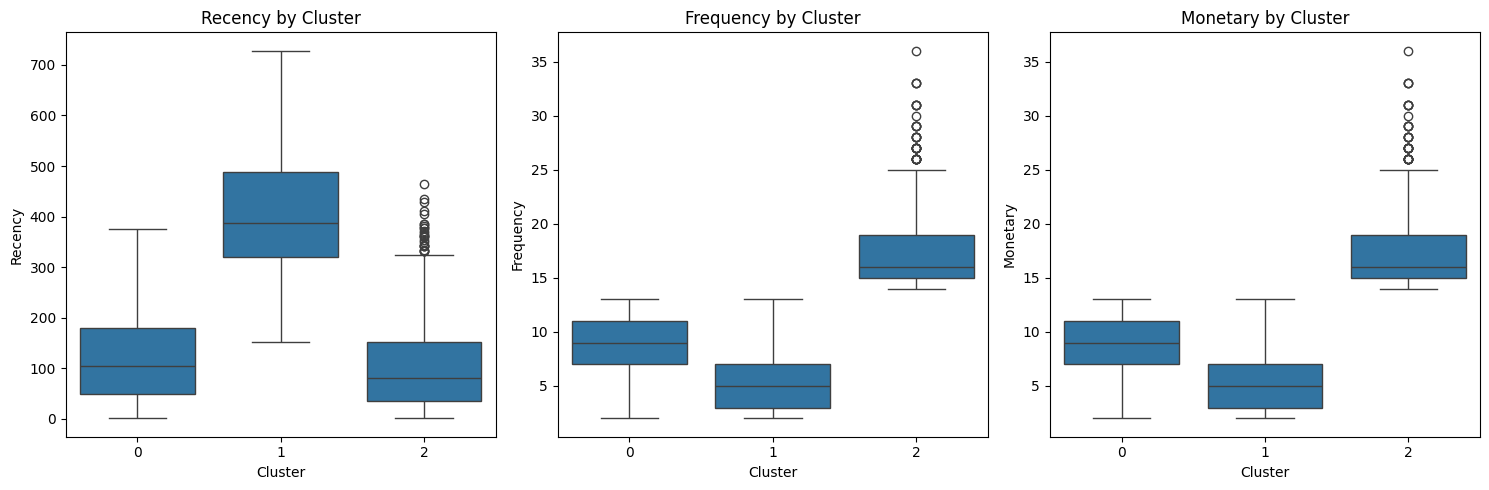

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Recency, Frequency, and Monetary for each cluster
plt.figure(figsize=(15, 5))

# Recency distribution across clusters
plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster', y='Recency', data=rfm)
plt.title('Recency by Cluster')

# Frequency distribution across clusters
plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster', y='Frequency', data=rfm)
plt.title('Frequency by Cluster')

# Monetary distribution across clusters
plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster', y='Monetary', data=rfm)
plt.title('Monetary by Cluster')

plt.tight_layout()
plt.show()


# **Box Plots (Recency, Frequency, Monetary by Cluster):**

**Recency by Cluster:**

Cluster 0: Customers in this cluster have a low median recency score, meaning they made recent purchases. They seem more engaged with frequent, recent purchases.
Cluster 1: These customers have a higher recency score, indicating that they haven’t purchased in a while compared to Cluster 0.
Cluster 2: This cluster has a broad range, but overall, the customers are less recent in their purchases. However, the outliers show some recent purchases.

**Frequency by Cluster:**

Cluster 0: The frequency of purchases is relatively low compared to Cluster 2, meaning these customers are not the most frequent buyers.
Cluster 1: The frequency here is lower, indicating that customers in this cluster tend to purchase less often.
Cluster 2: These customers purchase most frequently, as indicated by the high frequency score. The outliers show extreme frequency for certain customers.

**Monetary by Cluster:**

Cluster 0: Customers in this group have a moderate spending level.
Cluster 1: Customers here spend less compared to the other clusters.
Cluster 2: This cluster consists of high-value customers who spend more, with notable outliers showing extreme monetary values.

# **Scatter Plot of Customer Segmentation (K-Means):**

This plot shows Recency vs. Frequency, with the different colors representing different clusters.

**Yellow Cluster:** Customers in this cluster tend to make purchases more frequently and more recently, indicating highly engaged customers.

**Purple Cluster:**  These customers are less engaged in terms of both recency and frequency, likely representing inactive or low-engagement customers.

**Teal Cluster:**  Customers in this group have lower recency (they haven’t purchased recently) and lower frequency, suggesting they may be at risk of churn.

# **Insights:**

**Cluster 2 (Frequent & High-Value Customers):**  These are your most valuable customers in terms of spending, and they tend to purchase more frequently.
Strategies like loyalty programs, personalized offers, and early access to sales may help retain them.

**Cluster 1 (Less Engaged Customers):** This group has lower recency and frequency scores, with moderate spending. These customers might need re-engagement through marketing campaigns to bring them back into the buying cycle.

**Cluster 0 (Recent Low-Spend Customers):** These customers have recently purchased but don't spend as much. They might be new or low-budget buyers. You could consider upselling and cross-selling strategies to increase their average spend.

This segmentation helps you target different customer groups with tailored strategies to maximize retention, engagement, and revenue.